---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**Linear Regression Equation**](#Section11)
  
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Data Standardization**](#Section71)<br>
  - **7.2** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Linear Regression in Scikit-Learn**](#Section81)<br>
  - **8.2** [**Interpreting Model Coefficients**](#Section82)<br>
  - **8.3** [**Using the Model for Prediction**](#Section83)<br>
  - **8.4** [**Model Evaluation**](#section84)<br>
  - **8.5** [**Model Evaluation using R-Squared and adjusted R-squared**](#section85)<br>

**9.** [**Conclusion**](#Section9)<br>



---
# 1. **Introduction**

Your client for this project is an insurance provider.

- XYZ Health Insurance Co. Ltd. is one of the prominent insurance providers in the country.
- They offer impressive health plans and services to cater to the needs of different people.
- The insurance company also provides access to fitness assessment centers, wellness centers, diagnostic centers in addition to hospitalization centers.

Current Scenario
- The company is planning to introduce a new system that will help to easily monitor and predict the medical insurance prices of their customers.

### 1.1. **Assumptions of Linear Regression**

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/how-to-stop-making-assumptions-1200x600.png" width="300" height="160" /></center>
<br> 

1. There should be a **linear** and **additive** relationship between **dependent** (response) variable and **independent (predictor)** variable(s). 


2. There should be **no correlation** between the **residual (error)** terms. Absence of this phenomenon is known as **Autocorrelation**.


3. The **independent** variables should not be **correlated**. Absence of this phenomenon is known as **multicollinearity**.


4. The **error** terms must have **constant variance**. This phenomenon is known as **homoskedasticity**. The presence of non-constant **variance** is referred to **heteroskedasticity**.


5. The **error** terms must be **normally** distributed.

# 2. Problem Statement

**The current process suffers from the following problems**:

- The company uses manpower to predict the medical expenses of its insurers. Many factors are considered such as age, BMI, smoking habits, number of children, etc.
- It is a time and resource-intensive process and many times, inaccurate.
- The company plans to modernize its legacy systems and wants to implement an automated way of predicting the medical expenses of its insurers based on various factors.

- They have hired you as a data science consultant. They want to supplement their analysis and prediction with a more robust and accurate approach.

**Your Role**
- You are given a historical dataset that contains the medical charges of some of the insurers and many factors that determine those charges.
- Your task is to build a regression model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**
- Deliverable: Predicts the medical charges of insurers.
- Machine Learning Task: Regression
- Target Variable: charges
- Win Condition: N/A (best possible model)

**Evaluation Metric**
- The model evaluation will be based on the R2 score.


---
# 3. Installing & Importing Libraries

<a name = Section31></a>
### **3.1 Installing Libraries**

In [2]:
pip show pandas 

Name: pandas
Version: 1.4.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\vc00482003\anaconda3\lib\site-packages
Requires: pytz, python-dateutil, numpy
Required-by: phik, pandas-profiling, xarray, visions, statsmodels, seaborn, hvplot, holoviews, datashader
Note: you may need to restart the kernel to use updated packages.


In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

### 3.2. **Importing Packages** 

In [1]:
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('display.float_format', lambda x: '%.5f' % x)                       # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.                             
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                              # To calculate the R-squared score of a regression model
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

The dataset has columns describing features such as age, BMI, smoking habit, the region where the insurer resides, and their number of children.

Also included in the dataset is the column charges which indicates their medical **charges**

This is the data that we have to **predict for charges**.

| Id | Column Name| Description|
| :-- | :--| :--| 
|01| **age** | Indicates the age of the primary beneficiary |
|02| **sex** | Indicates the gender of the insurance contractor | 
|03|**bmi**|Indicates the BMI of the beneficiary|
|04|**children**|Indicates number of children covered by health insurance / Number of dependents|
|05|**region**|Indicates the region of residence of the beneficiary|
|06|**id**|Indicates the unique beneficiary id|
|07|**charges**|Indicates the individual medical costs billed by health insurance|


In [2]:
# import Train data set

med_train = pd.read_csv(r'C:\Users\vc00482003\Desktop\INSAIDclassdocs\ML\ML-Term4-ProjectDocs\Medical-Cost-Prediction\train_data.csv')
print('Data Shape:', med_train.shape)
med_train.head()

Data Shape: (1003, 8)


,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.65500,0,no,northwest,693,2352.96845
1,28,female,26.51000,2,no,southeast,1297,4340.44090
2,51,male,39.70000,1,no,southwest,634,9391.34600
3,47,male,36.08000,1,yes,southeast,1022,42211.13820
4,46,female,28.90000,2,no,southwest,178,8823.27900


In [3]:
med_test = pd.read_csv(r'C:\Users\vc00482003\Desktop\INSAIDclassdocs\ML\ML-Term4-ProjectDocs\Medical-Cost-Prediction\test_data.csv')
print('Data Shape:', med_test.shape)
med_test.head()

Data Shape: (335, 7)


,age,sex,bmi,children,smoker,region,id
0,45,female,25.17500,2,no,northeast,764
1,36,female,30.02000,0,no,northwest,887
2,64,female,26.88500,0,yes,northwest,890
3,46,male,25.74500,3,no,northwest,1293
4,19,male,31.92000,0,yes,northwest,259


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
# Train data description
med_train.describe()

,age,bmi,children,id,charges
count,1003.00000,1003.00000,1003.00000,1003.00000,1003.00000
mean,39.25523,30.51178,1.10469,666.87438,13267.93582
std,14.03910,6.01311,1.20462,386.57044,12051.35655
min,18.00000,15.96000,0.00000,0.00000,1121.87390
25%,27.00000,26.21000,0.00000,329.50000,4780.83940
50%,39.00000,30.20000,1.00000,675.00000,9447.38240
75%,51.00000,34.43000,2.00000,1001.50000,16840.66797
max,64.00000,53.13000,5.00000,1337.00000,62592.87309


In [5]:
# Test data description
med_test.describe()

,age,bmi,children,id
count,335.00000,335.00000,335.00000,335.00000
mean,39.06269,31.11734,1.06567,673.36716
std,14.10246,6.33363,1.20944,386.39253
min,18.00000,16.81500,0.00000,10.00000
25%,26.00000,26.50500,0.00000,348.00000
50%,39.00000,30.80000,1.00000,650.00000
75%,51.00000,35.27250,2.00000,1019.50000
max,64.00000,52.58000,5.00000,1334.00000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [6]:
#Train Data info
med_train.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 222.7 KB


C:\Users\vc00482003\AppData\Local\Temp\ipykernel_18264\1523996051.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  med_train.info(verbose = True, memory_usage = 'deep', null_counts = True)


In [7]:
#Test Data info
med_test.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
 6   id        335 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 71.8 KB


C:\Users\vc00482003\AppData\Local\Temp\ipykernel_18264\3135781463.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  med_test.info(verbose = True, memory_usage = 'deep', null_counts = True)


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [12]:
# Creating pandas profile for the main dataset of training
profile = ProfileReport(med_train, title="Medical Expense Data", html={'style':{'full_width':True}})

In [13]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Finding NULL values in Trian data

#Creating a New dataframe
missing_frame = pd.DataFrame(index = med_train.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = med_train.isnull().sum().values

#Calculating the percentage of null values
nullpercent = med_train.isnull().sum().values/med_train.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = med_train[med_train == 0].count().values

#Calculating the Percentage of Zero
zero_percent = med_train[med_train == 0].count().values / med_train.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,age,sex,bmi,children,smoker,region,id,charges
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zero Frequency,0.00000,0.00000,0.00000,425.00000,0.00000,0.00000,1.00000,0.00000
Missing %age,0.00000,0.00000,0.00000,42.37000,0.00000,0.00000,0.10000,0.00000


In [ ]:
# Drop ID as its least correlated plus only needed during final submission
# Children ave 425 zero Values which is ok as beneficiary can have no children
# No NULL values observed

In [9]:
# Finding NULL values in Test data

#Creating a New dataframe
missing_frame = pd.DataFrame(index = med_test.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = med_test.isnull().sum().values

#Calculating the percentage of null values
nullpercent = med_test.isnull().sum().values/med_test.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = med_test[med_test == 0].count().values

#Calculating the Percentage of Zero
zero_percent = med_test[med_test == 0].count().values / med_test.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,age,sex,bmi,children,smoker,region,id
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zero Frequency,0.00000,0.00000,0.00000,149.00000,0.00000,0.00000,0.00000
Missing %age,0.00000,0.00000,0.00000,44.48000,0.00000,0.00000,0.00000


In [ ]:
# Drop ID as its least correlated plus only needed during final submission
# Children ave 425 zero Values which is ok as beneficiary can have no children
# No NULL values observed

In [ ]:
# Finding oultiers and capping them in train data

In [10]:
med_train.describe()

,age,bmi,children,id,charges
count,1003.00000,1003.00000,1003.00000,1003.00000,1003.00000
mean,39.25523,30.51178,1.10469,666.87438,13267.93582
std,14.03910,6.01311,1.20462,386.57044,12051.35655
min,18.00000,15.96000,0.00000,0.00000,1121.87390
25%,27.00000,26.21000,0.00000,329.50000,4780.83940
50%,39.00000,30.20000,1.00000,675.00000,9447.38240
75%,51.00000,34.43000,2.00000,1001.50000,16840.66797
max,64.00000,53.13000,5.00000,1337.00000,62592.87309


C:\Users\vc00482003\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

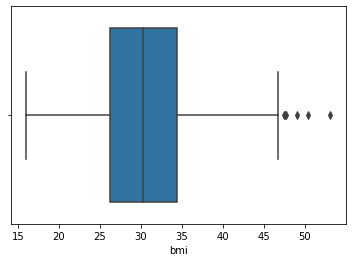

In [11]:
sns.boxplot(med_train['bmi'])

In [12]:
# capping & flooring outlier for BMI' variable in Train data

for col in med_train.columns:
    percentiles = med_train['bmi'].quantile([0.05, 0.95]).values
    med_train['bmi'][med_train['bmi'] <= percentiles[0]] = percentiles[0]
    med_train['bmi'][med_train['bmi'] >= percentiles[1]] = percentiles[1]

C:\Users\vc00482003\AppData\Local\Temp\ipykernel_18264\4223491373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_train['bmi'][med_train['bmi'] <= percentiles[0]] = percentiles[0]
C:\Users\vc00482003\AppData\Local\Temp\ipykernel_18264\4223491373.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_train['bmi'][med_train['bmi'] >= percentiles[1]] = percentiles[1]


In [13]:
med_train.describe()

,age,bmi,children,id,charges
count,1003.00000,1003.00000,1003.00000,1003.00000,1003.00000
mean,39.25523,30.44538,1.10469,666.87438,13267.93582
std,14.03910,5.48063,1.20462,386.57044,12051.35655
min,18.00000,21.26523,0.00000,0.00000,1121.87390
25%,27.00000,26.21000,0.00000,329.50000,4780.83940
50%,39.00000,30.20000,1.00000,675.00000,9447.38240
75%,51.00000,34.43000,2.00000,1001.50000,16840.66797
max,64.00000,40.48291,5.00000,1337.00000,62592.87309


C:\Users\vc00482003\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

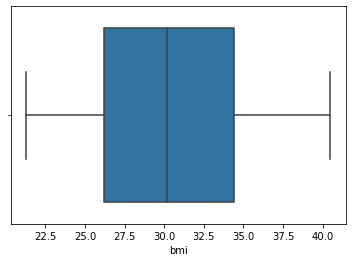

In [13]:
sns.boxplot(med_train['bmi']) #  BMI outlier removed in Train data

In [14]:
# Finding oultiers and capping them in test data

med_test.describe()

,age,bmi,children,id
count,335.00000,335.00000,335.00000,335.00000
mean,39.06269,31.11734,1.06567,673.36716
std,14.10246,6.33363,1.20944,386.39253
min,18.00000,16.81500,0.00000,10.00000
25%,26.00000,26.50500,0.00000,348.00000
50%,39.00000,30.80000,1.00000,650.00000
75%,51.00000,35.27250,2.00000,1019.50000
max,64.00000,52.58000,5.00000,1334.00000


C:\Users\vc00482003\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

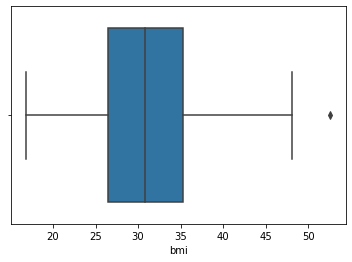

In [15]:
sns.boxplot(med_test['bmi'])

In [16]:
# capping & flooring outlier for BMI' variable in test data

for col in med_test.columns:
    percentiles = med_test['bmi'].quantile([0.05, 0.95]).values
    med_test['bmi'][med_test['bmi'] <= percentiles[0]] = percentiles[0]
    med_test['bmi'][med_test['bmi'] >= percentiles[1]] = percentiles[1]

C:\Users\vc00482003\AppData\Local\Temp\ipykernel_18264\3383702028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_test['bmi'][med_test['bmi'] <= percentiles[0]] = percentiles[0]
C:\Users\vc00482003\AppData\Local\Temp\ipykernel_18264\3383702028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_test['bmi'][med_test['bmi'] >= percentiles[1]] = percentiles[1]


In [17]:
med_test.describe()

,age,bmi,children,id
count,335.00000,335.00000,335.00000,335.00000
mean,39.06269,31.05388,1.06567,673.36716
std,14.10246,5.75397,1.20944,386.39253
min,18.00000,21.30000,0.00000,10.00000
25%,26.00000,26.50500,0.00000,348.00000
50%,39.00000,30.80000,1.00000,650.00000
75%,51.00000,35.27250,2.00000,1019.50000
max,64.00000,41.47007,5.00000,1334.00000


C:\Users\vc00482003\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

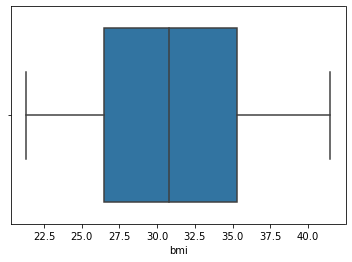

In [18]:
sns.boxplot(med_test['bmi'])

In [19]:
# Outliers have been capped in Train & Test data
# No null values found
# No Duplicate values found

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

### Is there a relationship between charges various other features like age, BMI, children?

C:\Users\vc00482003\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vc00482003\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vc00482003\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


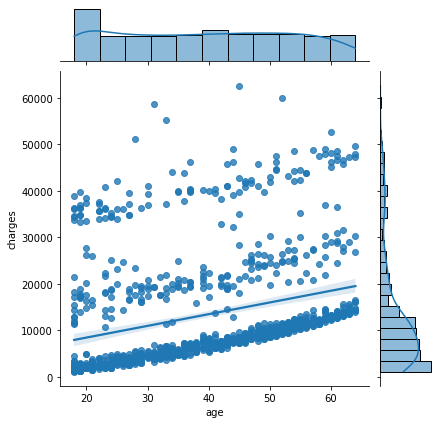

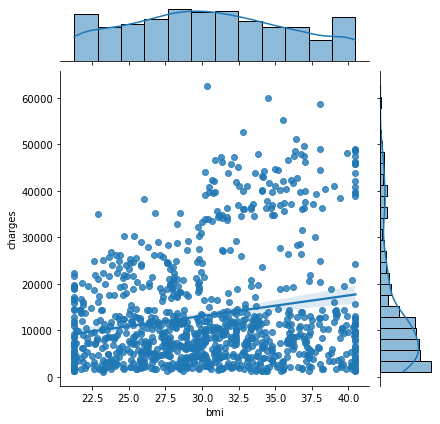

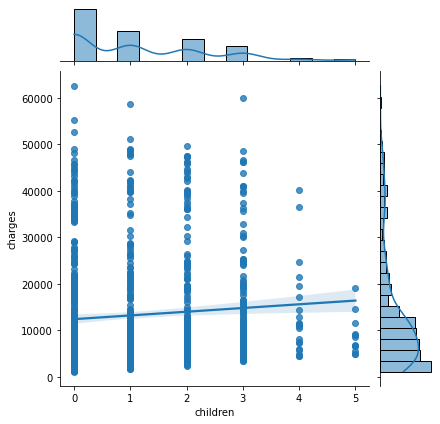

In [20]:
# Pair Plot analysis of continous variables 
JG1 = sns.jointplot("age", "charges", data=med_train, kind='reg')
JG2 = sns.jointplot("bmi", "charges", data=med_train, kind='reg')
JG3 = sns.jointplot("children","charges", data=med_train, kind='reg')

In [ ]:
# There is low relationshio between charges & children
# Mediocre relationship between charges & age . Same for charges & BMI.

<a name = Section7></a>

---
# **7. Post Data Processing**
---



<a name = Section73></a>
### **7.1 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [20]:
# Dividing training dataset into three parts, on the basis of categorical and numerical & charges variable alone.
med_con=med_train[['age', 'bmi','children']]
med_con.head()

,age,bmi,children
0,24,23.65500,0
1,28,26.51000,2
2,51,39.70000,1
3,47,36.08000,1
4,46,28.90000,2


In [21]:
med_con_charge=med_train[['charges']]
med_con_charge.head()

,charges
0,2352.96845
1,4340.44090
2,9391.34600
3,42211.13820
4,8823.27900


In [22]:
med_cat=med_train[['sex', 'smoker','region']]
med_cat.head()

,sex,smoker,region
0,male,no,northwest
1,female,no,southeast
2,male,no,southwest
3,male,yes,southeast
4,female,no,southwest


In [23]:
# One hot coding categorial variables

encoded_data = pd.get_dummies(med_cat) 
encoded_data.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,1,0,0,1,0,0
1,1,0,1,0,0,0,1,0
2,0,1,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0
4,1,0,1,0,0,0,0,1


In [24]:
# Scale numerical training data set
scaled_med_con = np.log1p(med_con) 
scaled_med_con

,age,bmi,children
0,3.21888,3.20498,0.00000
1,3.36730,3.31455,1.09861
2,3.95124,3.70623,0.69315
3,3.87120,3.61308,0.69315
4,3.85015,3.39786,1.09861
5,4.15888,3.30395,0.00000
6,3.66356,3.10303,1.09861
7,3.36730,3.30744,1.38629
8,3.25810,3.32504,1.38629
9,2.94444,3.43769,0.00000


In [25]:
# Concatenate cat and cont variables :

new_train_med = pd.concat([scaled_med_con,med_con_charge, encoded_data], axis=1)
new_train_med.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,3.21888,3.20498,0.00000,2352.96845,0,1,1,0,0,1,0,0
1,3.36730,3.31455,1.09861,4340.44090,1,0,1,0,0,0,1,0
2,3.95124,3.70623,0.69315,9391.34600,0,1,1,0,0,0,0,1
3,3.87120,3.61308,0.69315,42211.13820,0,1,0,1,0,0,1,0
4,3.85015,3.39786,1.09861,8823.27900,1,0,1,0,0,0,0,1


In [26]:
# Dividing test dataset into two, on the basis of categorical and numerical.
medtest_con=med_test[['age', 'bmi','children']]
medtest_con.head()

,age,bmi,children
0,45,25.17500,2
1,36,30.02000,0
2,64,26.88500,0
3,46,25.74500,3
4,19,31.92000,0


In [27]:
medtest_cat=med_test[['sex', 'smoker','region']]
medtest_cat.head()

,sex,smoker,region
0,female,no,northeast
1,female,no,northwest
2,female,yes,northwest
3,male,no,northwest
4,male,yes,northwest


In [28]:
# Scale numerical test data set
scaled_medtest_con = np.log1p(medtest_con) 
scaled_medtest_con.head()

,age,bmi,children
0,3.82864,3.26480,1.09861
1,3.61092,3.43463,0.00000
2,4.17439,3.32809,0.00000
3,3.85015,3.28635,1.38629
4,2.99573,3.49408,0.00000


In [29]:
# One hot coding categorial variables of test data

encoded_data1 = pd.get_dummies(medtest_cat) 
encoded_data1.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,1,0,1,0,0,0
1,1,0,1,0,0,1,0,0
2,1,0,0,1,0,1,0,0
3,0,1,1,0,0,1,0,0
4,0,1,0,1,0,1,0,0


In [30]:
# Concatenate cat and cont variables :

new_test_med = pd.concat([scaled_medtest_con,encoded_data1], axis=1)
new_test_med.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,3.82864,3.26480,1.09861,1,0,1,0,1,0,0,0
1,3.61092,3.43463,0.00000,1,0,1,0,0,1,0,0
2,4.17439,3.32809,0.00000,1,0,0,1,0,1,0,0
3,3.85015,3.28635,1.38629,0,1,1,0,0,1,0,0
4,2.99573,3.49408,0.00000,0,1,0,1,0,1,0,0


In [31]:
new_train_med.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [32]:
new_test_med.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [33]:
# split into train data

feature_cols = ['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']                
X_train = new_train_med[feature_cols]

In [34]:
y_train = new_train_med.charges
y_train.head()

0    2352.96845
1    4340.44090
2    9391.34600
3   42211.13820
4    8823.27900
Name: charges, dtype: float64

In [35]:
# split into test data

feature_cols = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']                
X_test = new_test_med[feature_cols]
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,3.82864,3.26480,1.09861,1,0,1,0,1,0,0,0
1,3.61092,3.43463,0.00000,1,0,1,0,0,1,0,0
2,4.17439,3.32809,0.00000,1,0,0,1,0,1,0,0
3,3.85015,3.28635,1.38629,0,1,1,0,0,1,0,0
4,2.99573,3.49408,0.00000,0,1,0,1,0,1,0,0


In [36]:
#Scaling Target Variable

y_train = np.log1p(med_train['charges']) 
y_train.head()

0    7.76386
1    8.37596
2    9.14765
3   10.65046
4    9.08526
Name: charges, dtype: float64

### Calculating and plotting heatmap correlation

In [40]:
# Dividing training dataset into two parts to find correlation
med_con_cor=med_train[['age', 'bmi','children','charges']]
med_con_cor.head()

,age,bmi,children,charges
0,24,23.65500,0,2352.96845
1,28,26.51000,2,4340.44090
2,51,39.70000,1,9391.34600
3,47,36.08000,1,42211.13820
4,46,28.90000,2,8823.27900


In [41]:
# one hot coding of categorial trianing data
encoded_data.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,1,0,0,1,0,0
1,1,0,1,0,0,0,1,0
2,0,1,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0
4,1,0,1,0,0,0,0,1


In [42]:
# Concatenate cat and cont variables :

med_train_cor = pd.concat([med_con_cor,encoded_data], axis=1)
med_train_cor.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,24,23.65500,0,2352.96845,0,1,1,0,0,1,0,0
1,28,26.51000,2,4340.44090,1,0,1,0,0,0,1,0
2,51,39.70000,1,9391.34600,0,1,1,0,0,0,0,1
3,47,36.08000,1,42211.13820,0,1,0,1,0,0,1,0
4,46,28.90000,2,8823.27900,1,0,1,0,0,0,0,1


Text(0.5, 1.0, 'Correlation between features')

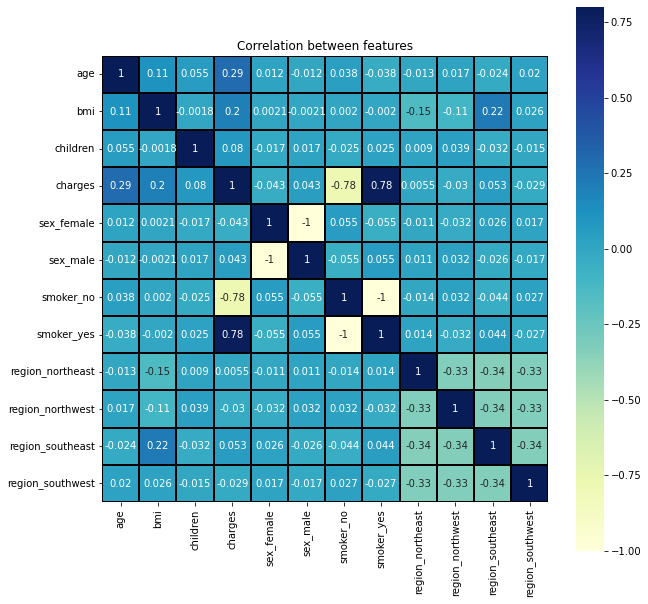

In [43]:
# Correlation plot analysis
corr = med_train_cor.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [ ]:
# sex & smoking habit is highly correlated to charges. region is least correlated
# age,bmi are have mediocre correlation. children have least correalation too

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Linear Regression model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **MSE**, **MAE** and **RMSE** scores.

- We will do **feature selection** and see if the scores improves. 

In [37]:
# create a model variable using the X & Y train data and usse this model to find the y_test data
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)

In [38]:
# Find the predicted test value
y_test = model.predict(X_test)  # create y-labels through the learned model
(y_test).shape

(335,)

In [39]:
# Unscale preciated target variable

y_pred_unscaled = np.expm1(y_test) 
y_pred_unscaled

array([ 9525.09703167,  6150.54733703, 56121.90678207,  9056.09057502,
       12603.68601149,  6600.30231003,  2425.80378664, 13235.38838141,
        4052.23296181, 10346.0733768 , 22780.8159076 ,  8150.53057945,
        4828.70836165, 49738.91494545, 54842.72436074, 47201.31770646,
       11760.85470955, 45980.34892211,  8349.83832512, 34068.99535708,
        4105.38487802,  8379.26242343,  2460.45214638,  4117.05746916,
       11285.5464817 , 11373.73879635, 11832.24887981,  5448.75163082,
       10337.57851963,  2254.98120182,  8482.44619021, 11255.66787436,
        3144.02395148,  5199.93962823,  4024.11014355,  9302.88337086,
        3120.6607818 ,  8061.02118662, 45934.44297291, 30073.03785657,
        3447.4579336 ,  3571.30142279, 12287.10671272,  9788.25524747,
        6202.70941773, 10701.78739363,  4014.5074307 ,  4158.42185931,
       42551.25302025,  5949.4365334 , 12577.33362907,  2496.24070713,
        9246.70075952,  2429.9359258 ,  9830.75501341, 11425.508233  ,
      

In [40]:
# Create the predicated variable dataframe
pred_df = pd.DataFrame(y_pred_unscaled, 
             columns=['Predicted charges'])
pred_df.head()

,Predicted charges
0,9525.09703
1,6150.54734
2,56121.90678
3,9056.09058
4,12603.68601


In [41]:
# Pulling the ids of charges
med_id=med_test[['id']]
med_id.head()

,id
0,764
1,887
2,890
3,1293
4,259


In [42]:
# Concatenate id & predicted charges :

pred_charges = pd.concat([med_id,pred_df], axis=1)
pred_charges.head()

,id,Predicted charges
0,764,9525.09703
1,887,6150.54734
2,890,56121.90678
3,1293,9056.09058
4,259,12603.68601


In [43]:
# saving the predicted dataframe
pred_charges.to_csv('Predicted_charges_final.csv',index=False)

### **8.2 Interpreting Model Coefficients**

In [44]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 3.046675708471584
Coefficients: [ 1.27916448  0.51699727  0.16525484  0.03579947 -0.03579947 -0.77257649
  0.77257649  0.08498348  0.01990688 -0.06107279 -0.04381757]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [45]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)  

In [46]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 3.046675708471584
age 1.2791644754010263
bmi 0.5169972702064556
children 0.16525483581168943
sex_female 0.035799466970822355
sex_male -0.03579946697082211
smoker_no -0.7725764917944022
smoker_yes 0.7725764917944022
region_northeast 0.08498347981981509
region_northwest 0.019906877860669924
region_southeast -0.061072792439183836
region_southwest -0.04381756524130131


### **8.3 Using the Model for Prediction**

In [47]:
y_pred_train = linreg.predict(X_train)

In [48]:
y_pred_test = linreg.predict(X_test)          

Let's Plot and see how our model is predicting with the test data

C:\Users\vc00482003\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

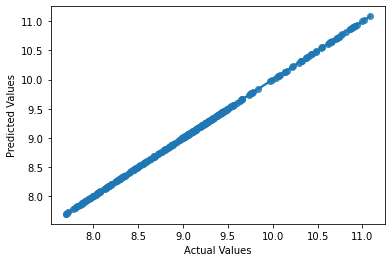

In [49]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## **8.4 Model evaluation** 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.

For example, if a model **predicts** that the **price** of apple is `Rs75/kg`, but the **actual price** of apple is `Rs100/kg`, then the **error** in prediction will be `Rs25/kg`.

Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [50]:
from sklearn import metrics

In [51]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [52]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.29062063120662107
MAE for test set is 0.0


In [53]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [54]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.19596284128485567
MSE for test set is 0.0


In [55]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [56]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.4426769039433339
RMSE for test set is 0.0


### **8.5 Model Evaluation using R-squared and Adjusted R-squared value**

In [57]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.7662062275530757
R2 score for test set is 1.0


In [58]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.7636111402706174
Adjusted R2 score for test set is 1.0
